## Name: Ahmed Ayman Abd-Alaziz Sharaf
## ID: 1806171

---

In [1]:
import pandas as pd #data manpulation
import numpy as np
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
import scipy

# 1) Cleaning + EDA + Standarization + Encoding 
import chardet #to detetmine dataset encoding

#preprocessing: replace numeric and categorical
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
from sklearn.preprocessing import OrdinalEncoder # object (no order)
from sklearn.preprocessing import OneHotEncoder # categorical 

# data imbalanced
from imblearn.datasets import make_imbalance # undersampling
from sklearn.utils import resample # oversampling
from imblearn.over_sampling import SMOTE # SMOTE all are numeric
from imblearn.over_sampling import SMOTENC # smote categorical features

# 2) Standarize nad change dist of features
from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it
#or
from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler, same as above


# 3) feature enginerring
from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
from sklearn.feature_selection import RFE, RFECV 
# a) numeric feature enginering
from sklearn.cluster import KMeans # Kmeans model for cluster feature
from scipy.spatial.distance import cdist # for elpow method
from sklearn.decomposition import PCA # for loadings and adding new feature
# b) categorical feature enginering
# from category_encoders import MEstimateEncoder # have m estimator


# 4) Data Modeling = train test split then model then get error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ShuffleSplit, StratifiedKFold #also has cross_val_score (cv)
from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
# ML algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
# Bagging + Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Stacking Regression & CLassification
# from vecstack import stacking # stacking Regression
# from mlxtend.classifier import StackingCVClassifier # stacking CLassification
import itertools # to make combo of stacks

# Evaluation for model
from sklearn.metrics import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
#for accurace of regression use model.score(y_pred, y_test) mean_absolute_error, mean_squared_error

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#for accurace of classification use precision, recall, f1, acc, classification_report, confusion_matrix, roc_curve (tpr, fpr) & roc_auc_score (AUC)

# you can use (cross_val_score == KFold) (like validation_split=0.1 to get validation_acc) for calssification or regression

#pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# 5) Model summary = features importance and effect + sharp values
# import eli5
# from eli5.sklearn import PermutationImportance # feature importance
# # from pdpbox import pdp, get_dataset, info_plots #for pdp plots
# import shap  # package used to calculate Shap values
import time

# 6) DNN & images & audio visualize
import tensorflow as tf
import cv2
import IPython

# 1) Starting with Data
* understand features & see data
* check dtypes
* Errors -> NaN
* summary

In [2]:
data = open('fashion-mnist_train.csv', 'rb')
result = chardet.detect(data.read(10000))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
df = pd.read_csv('fashion-mnist_train.csv', encoding=result['encoding']) # X_train, y_train
df_test = pd.read_csv('fashion-mnist_test.csv') # X_test, y_test
df # train_size = 60K record

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
columns = df.columns
columns # label = target & pixel which is the images

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [5]:
# dtypes are correct
df.info() # all are int64 so this is great

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
# Errors to NaN
for col in columns:
    if df[col].nunique() < 100: # corner pixels have smaller no of uniques
        print(col)
        print("Number of Uniques: ", df[col].nunique())
        print(sorted(df[col].unique()))
        print()

label
Number of Uniques:  10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

pixel1
Number of Uniques:  8
[0, 1, 2, 3, 4, 7, 14, 16]

pixel2
Number of Uniques:  17
[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 34, 36]

pixel3
Number of Uniques:  27
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 23, 25, 30, 32, 34, 35, 52, 54, 56, 78, 106, 226]

pixel4
Number of Uniques:  65
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28, 32, 34, 36, 39, 41, 46, 48, 49, 50, 52, 53, 54, 55, 56, 58, 64, 68, 70, 80, 82, 83, 86, 87, 90, 92, 96, 105, 106, 109, 110, 120, 121, 132, 144, 145, 146, 150, 164]

pixel27
Number of Uniques:  72
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 21, 24, 25, 26, 27, 28, 29, 31, 32, 33, 36, 41, 45, 46, 48, 49, 52, 53, 55, 57, 58, 59, 64, 66, 71, 72, 73, 74, 75, 77, 80, 82, 83, 84, 87, 91, 95, 96, 101, 104, 109, 111, 114, 119, 123, 129, 145, 149, 157, 164, 165, 170, 173, 180]

pixel28
Number of Uniques:  25
[0, 1, 

corner pixels have smaller no of uniques

In [7]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


# 2) Cleaning
* **NaN:** will check NaN
* **Dublicate:** will check duplicates
* **Outliers:** no outliers as it's image pixels
* **inconsistency:** No categorical columns like 'san francesco' & 'sf' so no data inconsistency

In [8]:
# No NaNs
print((sum(np.sum(df.isna())) / (df.shape[0] * df.shape[1]))* 100, '%')
df.dropna(inplace=True)
df

0.0 %


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# duplicates
index_duplicates = np.where(df.duplicated() == True)[0]
df.duplicated().sum() # 43 images duplicated lets show them 

43

In [10]:
df.loc[index_duplicates, :]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6293,3,0,0,0,0,0,0,0,0,57,...,22,0,0,0,0,0,0,0,0,0
11845,0,0,0,0,0,2,0,0,0,0,...,34,26,22,26,8,0,2,0,0,0
20114,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21571,0,0,0,0,0,0,0,0,0,24,...,136,99,18,0,0,0,0,0,0,0
22159,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23718,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24228,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24443,2,0,0,0,0,0,0,0,0,0,...,108,97,106,62,0,0,0,0,0,0
28184,3,0,0,0,0,0,0,0,0,0,...,48,24,0,0,0,0,0,0,0,0
28635,2,0,0,0,0,0,0,0,0,0,...,0,0,0,98,128,88,0,0,0,0


In [11]:
df.drop_duplicates(inplace=True) # -> will make model overfit and our dataset is large so drop them
df.duplicated().sum() # 0 images duplicated

0

In [12]:
# convert data_set into array of arrays of train_data
target = df['label']
train = df.drop('label', axis=1)
print(len(train.values))
train.values

59957


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
train = train.values
print(train.shape)
X_train = train.reshape(59957, 28, 28)
X_train.shape

(59957, 784)


(59957, 28, 28)

In [14]:
# convert test_set into array of arrays of train_data
l = len(df_test)
df_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
test_target = df_test['label']
X_test = df_test.drop('label', axis=1).values
X_test = X_test.reshape(l, 28, 28)
X_test.shape

(10000, 28, 28)

## View some images

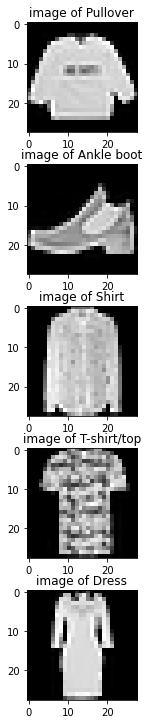

In [16]:
# plt.figure(figsize=(10,15))
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
fig.tight_layout()

for i in range(5):
    title = f'image of {target_names[target[i]]}'
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].set_title(title)

In [17]:
target.value_counts().sort_index() # data is balanced no calss imbalanced

0    5998
1    5996
2    5988
3    5997
4    5995
5    6000
6    5989
7    5996
8    6000
9    5998
Name: label, dtype: int64

# 3) Encoding
* target_encoding using tf.to_categorical()

In [18]:
target.values

array([2, 9, 6, ..., 8, 8, 7])

In [19]:
y_train = tf.keras.utils.to_categorical(target.values, num_classes=10)
y_test = tf.keras.utils.to_categorical(test_target.values, num_classes=10)
y_train[0:3] # correct

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

# 4) Feature Engineeing
* standarization

In [20]:
X_train = X_train / 255.0 # so values become btn 0->1
X_test = X_test / 255.0 # so values become btn 0->1
X_train.min(), X_train.max()

(0.0, 1.0)

# 5) Modeling

In [21]:
# for batch size
X_train = tf.expand_dims(X_train, 3)
X_test = tf.expand_dims(X_test, 3)
X_train

<tf.Tensor: shape=(59957, 28, 28, 1), dtype=float64, numpy=
array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],




In [22]:
# Tensor Board
# at terminal write (tensorboard --logdir=./Graph/)
import tensorboard as tb
tb_call_back = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)

In [23]:
#set early stopping criteria
pat = 5 #this is the number of epochs with no improvment after which the training will stop
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

In [24]:
def minist_model():
    input_x = tf.keras.Input(X_train[0].shape)
    x = tf.keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', padding='same')(input_x) #C1
    x = tf.keras.layers.AveragePooling2D()(x) #S2
    x = tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid')(x) #C3
    x = tf.keras.layers.AveragePooling2D()(x) #S4
    x = tf.keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid')(x) #C5
    x = tf.keras.layers.Flatten()(x) #Flatten    
    x = tf.keras.layers.Dense(84, activation='tanh')(x) #F6
    x = tf.keras.layers.Dense(10, activation='softmax')(x) #Output layer
    model = tf.keras.Model(inputs=input_x, outputs=x)
    return model

In [25]:
def training(X_train, y_train, epochs = 20, verbose = 1, validation_split = 0.1, opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)):
    model = minist_model()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy']) # accuracy
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=256, verbose=verbose, callbacks=[tb_call_back, early_stopping])
    return model, history
model, history = training(X_train, y_train)

Epoch 1/20
211/211 [==============================] - 4s 8ms/step - loss: 0.7583 - categorical_accuracy: 0.7209 - val_loss: 0.5648 - val_categorical_accuracy: 0.7945
Epoch 2/20
211/211 [==============================] - 1s 7ms/step - loss: 0.5021 - categorical_accuracy: 0.8167 - val_loss: 0.4944 - val_categorical_accuracy: 0.8230
Epoch 3/20
211/211 [==============================] - 1s 6ms/step - loss: 0.4419 - categorical_accuracy: 0.8387 - val_loss: 0.4434 - val_categorical_accuracy: 0.8377
Epoch 4/20
211/211 [==============================] - 1s 6ms/step - loss: 0.4029 - categorical_accuracy: 0.8530 - val_loss: 0.4194 - val_categorical_accuracy: 0.8491
Epoch 5/20
211/211 [==============================] - 1s 6ms/step - loss: 0.3766 - categorical_accuracy: 0.8623 - val_loss: 0.3897 - val_categorical_accuracy: 0.8607
Epoch 6/20
211/211 [==============================] - 1s 6ms/step - loss: 0.3573 - categorical_accuracy: 0.8701 - val_loss: 0.3659 - val_categorical_accuracy: 0.8676
Epoc

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120 

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2906 - categorical_accuracy: 0.8948


[0.29057011008262634, 0.8948000073432922]

In [28]:
# Hyperparameters: Optimizer - also modified batch size already!!

sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rms_opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop")
optimizers = [sgd_opt, adam_opt, rms_opt]
my_dictionary = {}

for i in range(len(optimizers)):
    model_hidden, history = training(X_train, y_train, opt = optimizers[i], verbose=2)
    result = model.evaluate(X_test, y_test)
    my_dictionary['model_'+ str(i)] = model_hidden
    my_dictionary['model_acc_'+ str(i)] = result[1]
my_dictionary

Epoch 1/20
211/211 - 2s - loss: 1.6810 - categorical_accuracy: 0.4706 - val_loss: 1.1216 - val_categorical_accuracy: 0.6828 - 2s/epoch - 9ms/step
Epoch 2/20
211/211 - 1s - loss: 0.9786 - categorical_accuracy: 0.6870 - val_loss: 0.8787 - val_categorical_accuracy: 0.7080 - 1s/epoch - 5ms/step
Epoch 3/20
211/211 - 1s - loss: 0.8194 - categorical_accuracy: 0.7179 - val_loss: 0.7746 - val_categorical_accuracy: 0.7317 - 1s/epoch - 5ms/step
Epoch 4/20
211/211 - 1s - loss: 0.7364 - categorical_accuracy: 0.7392 - val_loss: 0.7124 - val_categorical_accuracy: 0.7453 - 1s/epoch - 5ms/step
Epoch 5/20
211/211 - 1s - loss: 0.6833 - categorical_accuracy: 0.7550 - val_loss: 0.6718 - val_categorical_accuracy: 0.7575 - 1s/epoch - 6ms/step
Epoch 6/20
211/211 - 1s - loss: 0.6466 - categorical_accuracy: 0.7664 - val_loss: 0.6434 - val_categorical_accuracy: 0.7685 - 1s/epoch - 5ms/step
Epoch 7/20
211/211 - 1s - loss: 0.6195 - categorical_accuracy: 0.7750 - val_loss: 0.6225 - val_categorical_accuracy: 0.7765 

{'model_0': <keras.engine.functional.Functional at 0x7f8df669f820>,
 'model_acc_0': 0.8948000073432922,
 'model_1': <keras.engine.functional.Functional at 0x7f8df6652130>,
 'model_acc_1': 0.8948000073432922,
 'model_2': <keras.engine.functional.Functional at 0x7f8df6589760>,
 'model_acc_2': 0.8948000073432922}

#### Evaluate acording to 5Fold CV

In [29]:
def k_fold_cross_validation(X, y, X_test, y_test, k = 5, opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)):
    # instantiate k_fold 
    k_fold = StratifiedKFold(k, shuffle=True, random_state=42)
    # output lists that will hold accuracy and loss for both train and validation
    # for each fold
    results = []
    historys = []
    kfold_idx = 1
    # loop through the 5 folds
    for train_idx , val_idx in k_fold.split(X, y):
        print(f'Training {kfold_idx} Fold')
        kfold_idx += 1
        # determine from the train data which fold will be used for validation, and the other will be for training
        X_train , y_train = np.array(X)[train_idx], np.array(y)[train_idx]
        X_val , y_val = np.array(X)[val_idx], np.array(y)[val_idx]
        model = minist_model()
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy']) # accuracy
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=256, verbose=1, callbacks=[tb_call_back, early_stopping])
        test_score = model.evaluate(X_test, y_test)[1]
        historys.append(history)
        results.append(test_score)
        print('\n\n\n')
    print("%.2f%% (+/- %.2f%%)" % (np.mean(results), np.std(results)))
    return results, historys

In [30]:
results, historys = k_fold_cross_validation(X_train, target, X_test, test_target, k=5)
print("%.2f%% (+/- %.2f%%)" % (np.mean(results), np.std(results)))

Training 1 Fold
Epoch 1/20
188/188 [==============================] - 2s 9ms/step - loss: 0.7540 - sparse_categorical_accuracy: 0.7311 - val_loss: 0.5468 - val_sparse_categorical_accuracy: 0.8005
Epoch 2/20
188/188 [==============================] - 1s 6ms/step - loss: 0.4852 - sparse_categorical_accuracy: 0.8253 - val_loss: 0.4630 - val_sparse_categorical_accuracy: 0.8308
Epoch 3/20
188/188 [==============================] - 1s 6ms/step - loss: 0.4242 - sparse_categorical_accuracy: 0.8486 - val_loss: 0.4467 - val_sparse_categorical_accuracy: 0.8307
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 0.3889 - sparse_categorical_accuracy: 0.8590 - val_loss: 0.3939 - val_sparse_categorical_accuracy: 0.8556
Epoch 5/20
188/188 [==============================] - 1s 6ms/step - loss: 0.3625 - sparse_categorical_accuracy: 0.8696 - val_loss: 0.3689 - val_sparse_categorical_accuracy: 0.8689
Epoch 6/20
188/188 [==============================] - 1s 6ms/step - loss: 0.3460 - s

#### Convergence Curve of LeNet-5 
* categorical_acc
* val_categorical_acc

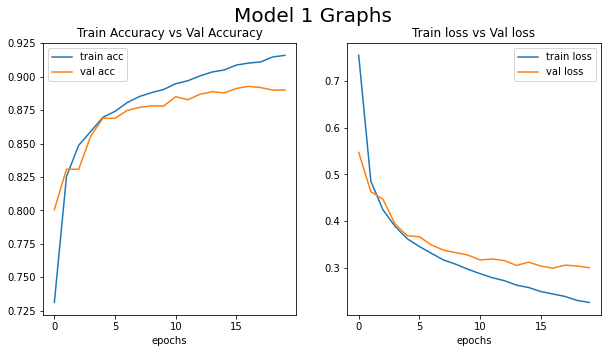

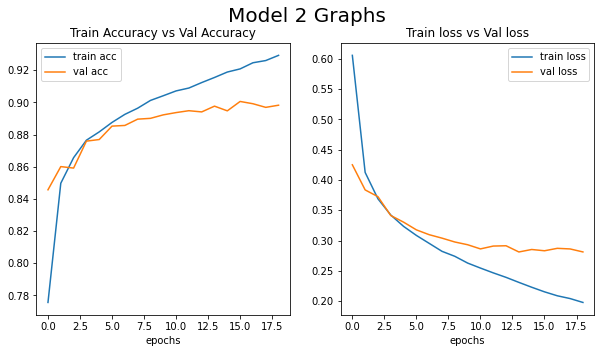

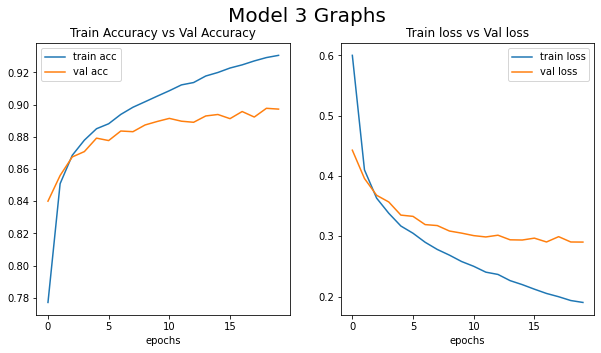

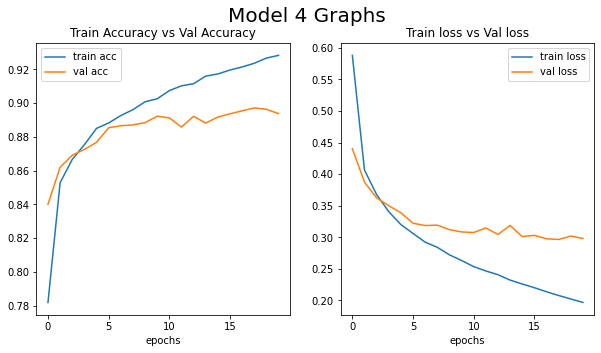

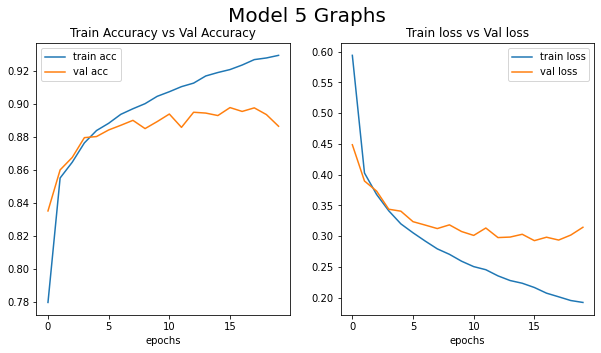

In [31]:
# will plot 5Folds models
sparse_categorical_accuracy = []
loss_train = []
val_sparse_categorical_accuracy = []
loss_val = []

for i in range(5):
    sparse_categorical_accuracy.append(historys[i].history['sparse_categorical_accuracy'])
    loss_train.append(historys[i].history['loss'])
    val_sparse_categorical_accuracy.append(historys[i].history['val_sparse_categorical_accuracy'])
    loss_val.append(historys[i].history['val_loss'])

for i in range(5):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # categorical_acc + loss | val_categorical_acc + loss
    fig.suptitle(f'Model {i+1} Graphs', fontsize=20)

    axes[0].plot(sparse_categorical_accuracy[i], label='train acc')
    axes[0].plot(val_sparse_categorical_accuracy[i], label='val acc')
    axes[0].set_title('Train Accuracy vs Val Accuracy')
    axes[0].set_xlabel('epochs')
    axes[0].legend()

    axes[1].plot(loss_train[i], label='train loss')
    axes[1].plot(loss_val[i], label='val loss')
    axes[1].set_title('Train loss vs Val loss')
    axes[1].set_xlabel('epochs')
    axes[1].legend()
    plt.show()

**Comment:**

model underfit because arch is shallow and didnt catch all paterns of data

In [32]:
# inference model
# training()
# evaluate_test

#### Transfer learning

* 1st convert Gray_scale img to RGB as pre_trained models are trained for (or) Modify first conv of pre_trained Model.

* 2nd understand input_shape of pre_trained Model you choose and understand Scaling_of_pixels needed for this Model + Augmentation and resize and scalling if needed.

* 3rd Apply Transfer Learning (which layers then freeze then Train).

* 4th Optional (fine Tunning model with low learning rate to prevent overfiting).

**Which Pretrained models will I use:**
* VGG
* MobileNetV2
* InceptionResNetV2

In [33]:
X_train = train.reshape(59957, 28, 28)
X_test = df_test.drop('label', axis=1).values
X_test = X_test.reshape(l, 28, 28)
X_train.shape

(59957, 28, 28)

In [34]:
grey_images_arr = np.array(X_train)
grey_images_arr = np.expand_dims(grey_images_arr, -1)

grey_images_arr_test = np.array(X_test)
grey_images_arr_test = np.expand_dims(grey_images_arr_test, -1)

grey_images_arr.shape
# have 1 dim at last for making RGB channel then b4 modeling we will expand another dim

(59957, 28, 28, 1)

(28, 28, 3)

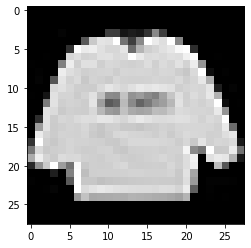

In [35]:
# 1 example
grey_image_arr_3_channel = grey_images_arr[0, :, :, :].repeat(3, axis=-1)
plt.imshow(grey_image_arr_3_channel)
grey_image_arr_3_channel.shape

### convert Gray to RGB image 


In [36]:
# convert Gray to RGB image 
grey_images_arr = np.repeat(grey_images_arr, 3, axis=3)
grey_images_arr_test = np.repeat(grey_images_arr_test, 3, axis=3)

grey_images_arr.shape

(59957, 28, 28, 3)

In [37]:
# for batch size
X_train = tf.expand_dims(grey_images_arr, -1)
X_test = tf.expand_dims(grey_images_arr_test, -1)
X_train.shape

TensorShape([59957, 28, 28, 3, 1])

#### Transfer learning using VGG

In [38]:
# which layers removed when include_top = False?
base_model = tf.keras.applications.VGG16(include_top=True, weights='imagenet')
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [39]:
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(32,32,3), weights='imagenet')
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Flatten + FC 4096 + FC 4096

In [40]:
base_model = tf.keras.applications.VGG16(include_top=False, input_shape=(32,32,3), weights='imagenet')

# Freeze all the layers
for layer in base_model.layers[:]:
    layer.trainable = False
    
# Add Dense layer as in VGG16
inputs = tf.keras.Input(shape=(28, 28, 3))
output = tf.keras.layers.Resizing(32, 32)(inputs)
output = tf.keras.applications.vgg16.preprocess_input(output) # equivilent to Rescalling as next line
# output = tf.keras.layers.Rescaling(scale=1/127.5, offset=-1)(output)
output = base_model(output, training=False)
output = tf.keras.layers.Flatten()(output)
output = tf.keras.layers.Dense(units=4096, activation='relu')(output)
output = tf.keras.layers.Dense(units=4096, activation='relu')(output)
output = tf.keras.layers.Dense(units=10, activation='softmax')(output)
model = tf.keras.Model(inputs, output)

In [41]:
# Defining callbacks

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # early stopping
# csv_logger = CSVLogger(os.path.join('eval','4_eval_resnet_pretrained.log')) # save metrics/loss in folder
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='auto')
# reduce lr equation

In [42]:
n_epochs = 20
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy']) # accuracy
history = model.fit(X_train, y_train, validation_split=0.1, epochs=n_epochs, batch_size=256, verbose = 1, callbacks=[es_callback, lr_callback])

Epoch 1/20
211/211 [==============================] - 14s 55ms/step - loss: 2.5025 - categorical_accuracy: 0.7968 - val_loss: 0.4121 - val_categorical_accuracy: 0.8489 - lr: 0.0010
Epoch 2/20
211/211 [==============================] - 10s 46ms/step - loss: 0.3467 - categorical_accuracy: 0.8707 - val_loss: 0.3906 - val_categorical_accuracy: 0.8606 - lr: 0.0010
Epoch 3/20
211/211 [==============================] - 10s 48ms/step - loss: 0.2911 - categorical_accuracy: 0.8901 - val_loss: 0.4021 - val_categorical_accuracy: 0.8579 - lr: 0.0010
Epoch 4/20
211/211 [==============================] - 10s 46ms/step - loss: 0.2532 - categorical_accuracy: 0.9043 - val_loss: 0.4319 - val_categorical_accuracy: 0.8581 - lr: 0.0010
Epoch 5/20
211/211 [==============================] - 10s 46ms/step - loss: 0.2206 - categorical_accuracy: 0.9166 - val_loss: 0.4613 - val_categorical_accuracy: 0.8589 - lr: 0.0010
Epoch 6/20
211/211 [==============================] - 10s 46ms/step - loss: 0.2003 - categorica

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.5236 - categorical_accuracy: 0.8747


[0.5236116051673889, 0.8747000098228455]

#### (optional) Fine Tunning Model

In [44]:
base_model.trainable = True

n_epochs = 10
opt = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999) # low learning rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy']) # accuracy
history = model.fit(X_train, y_train, validation_split=0.1, epochs=n_epochs, batch_size=256, verbose = 1, callbacks=[es_callback, lr_callback])

Epoch 1/10
211/211 [==============================] - 28s 118ms/step - loss: 0.0747 - categorical_accuracy: 0.9716 - val_loss: 0.5743 - val_categorical_accuracy: 0.8702 - lr: 1.0000e-05
Epoch 2/10
211/211 [==============================] - 23s 109ms/step - loss: 0.0575 - categorical_accuracy: 0.9791 - val_loss: 0.5940 - val_categorical_accuracy: 0.8768 - lr: 1.0000e-05
Epoch 3/10
211/211 [==============================] - 23s 109ms/step - loss: 0.0428 - categorical_accuracy: 0.9849 - val_loss: 0.5884 - val_categorical_accuracy: 0.8831 - lr: 1.0000e-05
Epoch 4/10
211/211 [==============================] - 23s 109ms/step - loss: 0.0354 - categorical_accuracy: 0.9879 - val_loss: 0.6410 - val_categorical_accuracy: 0.8756 - lr: 1.0000e-05
Epoch 5/10
211/211 [==============================] - 23s 109ms/step - loss: 0.0382 - categorical_accuracy: 0.9865 - val_loss: 0.6388 - val_categorical_accuracy: 0.8813 - lr: 1.0000e-05
Epoch 6/10
211/211 [==============================] - ETA: 0s - loss: 

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.6093 - categorical_accuracy: 0.8923


[0.6093006134033203, 0.892300009727478]

#### Transfer learning using MobileNet

In [46]:
# which layers removed when include_top = False?
base_model = tf.keras.applications.MobileNetV2(include_top=True, weights='imagenet')
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [47]:
# which layers removed when include_top = False?
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_15[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

GlobalAveragePooling2D

In [48]:
# MobileNet 
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Freeze all the layers
for layer in base_model.layers[:]:
    layer.trainable = False
    
# Add Dense layer as in VGG16
inputs = tf.keras.Input(shape=(28, 28, 3))
output = tf.keras.layers.Resizing(32, 32)(inputs)
output = tf.keras.applications.mobilenet.preprocess_input(output) # equivilent to Rescalling as next line
# output = tf.keras.layers.Rescaling(scale=1/127.5, offset=-1)(output)
output = base_model(output, training=False)
output = tf.keras.layers.GlobalAveragePooling2D()(output)
output = tf.keras.layers.Dense(units=10, activation='softmax')(output)
model = tf.keras.Model(inputs, output)

In [49]:
n_epochs = 20
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy']) # accuracy
history = model.fit(X_train, y_train, validation_split=0.1, epochs=n_epochs, batch_size=256, verbose = 2, callbacks=[es_callback, lr_callback])

Epoch 1/20
211/211 - 8s - loss: 2.0672 - categorical_accuracy: 0.2955 - val_loss: 1.9303 - val_categorical_accuracy: 0.3426 - lr: 0.0010 - 8s/epoch - 39ms/step
Epoch 2/20
211/211 - 4s - loss: 1.8446 - categorical_accuracy: 0.3855 - val_loss: 1.8079 - val_categorical_accuracy: 0.3901 - lr: 0.0010 - 4s/epoch - 17ms/step
Epoch 3/20
211/211 - 4s - loss: 1.7518 - categorical_accuracy: 0.3996 - val_loss: 1.7453 - val_categorical_accuracy: 0.3961 - lr: 0.0010 - 4s/epoch - 17ms/step
Epoch 4/20
211/211 - 4s - loss: 1.6999 - categorical_accuracy: 0.4039 - val_loss: 1.7073 - val_categorical_accuracy: 0.3989 - lr: 0.0010 - 4s/epoch - 17ms/step
Epoch 5/20
211/211 - 4s - loss: 1.6669 - categorical_accuracy: 0.4062 - val_loss: 1.6823 - val_categorical_accuracy: 0.4003 - lr: 0.0010 - 4s/epoch - 17ms/step
Epoch 6/20
211/211 - 4s - loss: 1.6441 - categorical_accuracy: 0.4084 - val_loss: 1.6646 - val_categorical_accuracy: 0.4036 - lr: 0.0010 - 4s/epoch - 17ms/step
Epoch 7/20
211/211 - 4s - loss: 1.6275 -

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.5679 - categorical_accuracy: 0.4288


[1.567887306213379, 0.42879998683929443]

#### (optional) Fine Tunning Model

In [51]:
base_model.trainable = True

n_epochs = 10
opt = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999) # low learning rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy']) # accuracy
history = model.fit(X_train, y_train, validation_split=0.1, epochs=n_epochs, batch_size=256, verbose = 1, callbacks=[es_callback, lr_callback])

Epoch 1/10
211/211 [==============================] - 16s 52ms/step - loss: 0.7939 - categorical_accuracy: 0.7273 - val_loss: 0.6169 - val_categorical_accuracy: 0.7777 - lr: 1.0000e-05
Epoch 2/10
211/211 [==============================] - 9s 44ms/step - loss: 0.5264 - categorical_accuracy: 0.8125 - val_loss: 0.5046 - val_categorical_accuracy: 0.8179 - lr: 1.0000e-05
Epoch 3/10
211/211 [==============================] - 10s 47ms/step - loss: 0.4418 - categorical_accuracy: 0.8406 - val_loss: 0.4416 - val_categorical_accuracy: 0.8457 - lr: 1.0000e-05
Epoch 4/10
211/211 [==============================] - 10s 46ms/step - loss: 0.3945 - categorical_accuracy: 0.8572 - val_loss: 0.4289 - val_categorical_accuracy: 0.8446 - lr: 1.0000e-05
Epoch 5/10
211/211 [==============================] - 9s 45ms/step - loss: 0.3640 - categorical_accuracy: 0.8682 - val_loss: 0.3965 - val_categorical_accuracy: 0.8604 - lr: 1.0000e-05
Epoch 6/10
211/211 [==============================] - 9s 45ms/step - loss: 0.

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3126 - categorical_accuracy: 0.8880


[0.3125702738761902, 0.8880000114440918]

#### Transfer learning using InceptionResNetV2

In [53]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=True)
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_27 (Conv2D)             (None, 149, 149, 32  864         ['input_18[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_27[0][0]']              
 alization)                     )                                               

In [54]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_230 (Conv2D)            (None, 37, 37, 32)   864         ['input_19[0][0]']               
                                                                                                  
 batch_normalization_203 (Batch  (None, 37, 37, 32)  96          ['conv2d_230[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_203 (Activation)    (None, 37, 37, 32)   0           ['batch_normali

In [55]:
# InceptionResNetV2 
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
# Freeze all the layers
for layer in base_model.layers[:]:
    layer.trainable = False
    
# Add Dense layer as in VGG16
inputs = tf.keras.Input(shape=(28, 28, 3))
output = tf.keras.layers.Resizing(75, 75)(inputs)
output = tf.keras.applications.inception_resnet_v2.preprocess_input(output) # equivilent to Rescalling as next line
# output = tf.keras.layers.Rescaling(scale=1/127.5, offset=-1)(output)
output = base_model(output, training=False)
output = tf.keras.layers.GlobalAveragePooling2D()(output)
output = tf.keras.layers.Dense(units=10, activation='softmax')(output)
model = tf.keras.Model(inputs, output)

In [56]:
n_epochs = 20
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy']) # accuracy
history = model.fit(X_train, y_train, validation_split=0.1, epochs=n_epochs, batch_size=256, verbose = 2, callbacks=[es_callback, lr_callback])

Epoch 1/20
211/211 - 44s - loss: 0.7374 - categorical_accuracy: 0.7635 - val_loss: 0.5189 - val_categorical_accuracy: 0.8227 - lr: 0.0010 - 44s/epoch - 207ms/step
Epoch 2/20
211/211 - 29s - loss: 0.4471 - categorical_accuracy: 0.8471 - val_loss: 0.4674 - val_categorical_accuracy: 0.8339 - lr: 0.0010 - 29s/epoch - 137ms/step
Epoch 3/20
211/211 - 26s - loss: 0.4069 - categorical_accuracy: 0.8589 - val_loss: 0.4386 - val_categorical_accuracy: 0.8499 - lr: 0.0010 - 26s/epoch - 123ms/step
Epoch 4/20
211/211 - 26s - loss: 0.3749 - categorical_accuracy: 0.8693 - val_loss: 0.4067 - val_categorical_accuracy: 0.8604 - lr: 0.0010 - 26s/epoch - 123ms/step
Epoch 5/20
211/211 - 26s - loss: 0.3580 - categorical_accuracy: 0.8749 - val_loss: 0.4074 - val_categorical_accuracy: 0.8594 - lr: 0.0010 - 26s/epoch - 123ms/step
Epoch 6/20
211/211 - 26s - loss: 0.3447 - categorical_accuracy: 0.8793 - val_loss: 0.3980 - val_categorical_accuracy: 0.8621 - lr: 0.0010 - 26s/epoch - 124ms/step
Epoch 7/20
211/211 - 2

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 13s 40ms/step - loss: 0.3382 - categorical_accuracy: 0.8780


[0.3381580710411072, 0.878000020980835]

### (Optional) Fine Tunning

In [58]:
base_model.trainable = True

n_epochs = 10
opt = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999) # low learning rate
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy']) # accuracy
history = model.fit(X_train, y_train, validation_split=0.1, epochs=n_epochs, batch_size=256, verbose = 1, callbacks=[es_callback, lr_callback])

Epoch 1/10
211/211 [==============================] - 117s 455ms/step - loss: 0.2382 - categorical_accuracy: 0.9142 - val_loss: 0.2915 - val_categorical_accuracy: 0.8996 - lr: 1.0000e-05
Epoch 2/10
211/211 [==============================] - 87s 414ms/step - loss: 0.1470 - categorical_accuracy: 0.9483 - val_loss: 0.2802 - val_categorical_accuracy: 0.9014 - lr: 1.0000e-05
Epoch 3/10
211/211 [==============================] - 87s 413ms/step - loss: 0.0898 - categorical_accuracy: 0.9712 - val_loss: 0.2773 - val_categorical_accuracy: 0.9069 - lr: 1.0000e-05
Epoch 4/10
211/211 [==============================] - 87s 413ms/step - loss: 0.0509 - categorical_accuracy: 0.9871 - val_loss: 0.2947 - val_categorical_accuracy: 0.9091 - lr: 1.0000e-05
Epoch 5/10
211/211 [==============================] - 87s 413ms/step - loss: 0.0267 - categorical_accuracy: 0.9954 - val_loss: 0.3118 - val_categorical_accuracy: 0.9109 - lr: 1.0000e-05
Epoch 6/10
211/211 [==============================] - 90s 425ms/step 

In [59]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 12s 39ms/step - loss: 0.3588 - categorical_accuracy: 0.9171


[0.3588424324989319, 0.9171000123023987]